In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rchfile = 'net_infiltration__2010-01-01_to_2017-12-31__40_by_20.nc'
pumping_file = 'irrigation__2010-01-01_to_2017-12-31__40_by_20.nc'

In [3]:
pumping = xr.open_dataset(pumping_file)

In [4]:
pump_year = 2015

In [5]:
pump_oneyear = pumping['irrigation'].loc['1/1/{0:d}'.format(pump_year):'12/31/{0:d}'.format(pump_year)].sum(axis=0).values

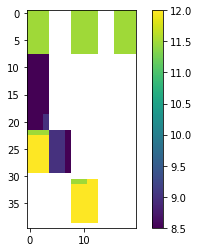

In [6]:
pump_oneyear[pump_oneyear<=0] = np.nan
plt.imshow(pump_oneyear)
plt.colorbar()

In [7]:
rch = xr.open_dataset(rchfile)

In [8]:
rch

<xarray.Dataset>
Dimensions:           (time: 2922, x: 20, y: 40)
Coordinates:
  * time              (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2017-12-31
  * y                 (y) float64 1.182e+06 1.182e+06 ... 1.173e+06 1.173e+06
  * x                 (x) float64 5.165e+05 5.168e+05 ... 5.21e+05 5.213e+05
    lat               (y, x) float64 ...
    lon               (y, x) float64 ...
Data variables:
    net_infiltration  (time, y, x) float32 ...
    crs               int32 ...
Attributes:
    source:              net_infiltration output from SWB run started on Nov ...
    executable_version:  version 2.0, build 892, Git branch:  master, Git com...
    conventions:         CF-1.6
    history:             Nov 17 2018 20:21:46: Soil-Water-Balance run started.

In [9]:
rch_oneyear=rch['net_infiltration'].loc['1/1/{0:d}'.format(pump_year):'12/31/{0:d}'.format(pump_year)].sum(axis=0).values

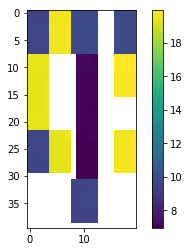

In [10]:
rch_oneyear[rch_oneyear<=0]=np.nan
plt.imshow(rch_oneyear)
plt.colorbar()

In [11]:
parcels = np.loadtxt('swb_files/parcels.dat')

In [12]:
allparcels = np.unique(parcels)

In [14]:
total_pumping = dict(zip([int(i) for i in allparcels],
                         [np.sum(pump_oneyear[parcels==i]) for i in allparcels]))

In [15]:
total_pumping

{0: nan,
 1: 368.0,
 2: nan,
 3: 460.0,
 4: 368.0,
 5: 204.0,
 6: nan,
 7: 273.5,
 8: 382.0,
 9: 284.0,
 10: nan,
 11: 478.5,
 12: nan,
 13: nan,
 14: nan,
 15: nan,
 16: nan}

In [16]:
np.nansum(pump_oneyear)

2818.0

In [17]:
np.nansum(rch_oneyear)

5980.4224

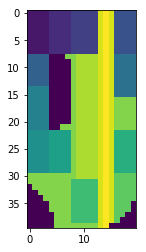

In [18]:
plt.imshow(parcels)

In [19]:
r = [np.mean(np.where(parcels==i)[0]) for i in allparcels]
c = [np.mean(np.where(parcels==i)[1]) for i in allparcels]

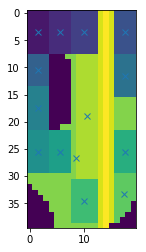

In [20]:
plt.imshow(parcels)
plt.plot(c[1:-2],r[1:-2],'x')

In [28]:
rc = pd.DataFrame({'parcel':[int(i) for i in allparcels[1:-2]],'r':r[1:-2],'c':c[1:-2]})

In [29]:

rc

,parcel,r,c
0,1,3.500000,1.500000
1,2,3.500000,5.500000
2,3,3.500000,10.000000
3,4,3.500000,17.500000
4,5,10.500000,1.500000
5,6,11.500000,17.500000
6,7,17.500000,1.500000
7,8,25.500000,1.500000
8,9,25.500000,5.500000
9,10,25.500000,17.500000


In [30]:
rc.to_csv('parcel_centroids.dat', index=False)

In [31]:
rc = pd.read_csv('parcel_centroids.dat')

In [32]:

rc

,parcel,r,c
0,1,3.500000,1.500000
1,2,3.500000,5.500000
2,3,3.500000,10.000000
3,4,3.500000,17.500000
4,5,10.500000,1.500000
5,6,11.500000,17.500000
6,7,17.500000,1.500000
7,8,25.500000,1.500000
8,9,25.500000,5.500000
9,10,25.500000,17.500000
